### Haddock plots and analysis


In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns


In [2]:
# load structures and clusters files

structures = pd.read_csv('run1/structures/it1/water/structures_haddock-sorted.stat', sep=' ')

clusters = pd.read_csv('run1/structures/it1/water/clusters_haddock-sorted.stat_best4', sep=' ')


In [3]:
structures.head()


,#struc,haddock-score,rmsd_all,Einter,Enb,Evdw+0.1Eelec,Evdw,Eelec,Eair,Ecdih,...,Edani,#NOEviol,#Dihedviol,#Jviol,#Saniviol,#veanviol,#Daniviol,bsa,dH,Edesolv
0,protein-protein_188w.pdb,-149.384591,0.000,-406.398,-412.591,-85.9796,-49.6895,-362.901,6.19309,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601.75,-7223.01,-27.7342
1,protein-protein_130w.pdb,-149.223298,0.797,-439.379,-449.335,-84.6846,-44.1679,-405.167,9.95602,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1638.56,-7259.08,-25.0176
2,protein-protein_165w.pdb,-138.187350,0.801,-464.396,-477.200,-81.2895,-37.2994,-439.901,12.80450,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1569.95,-8128.05,-14.1882
3,protein-protein_94w.pdb,-137.229050,0.975,-445.087,-462.138,-82.8679,-40.7268,-421.411,17.05150,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1506.26,-8215.65,-13.9252
4,protein-protein_86w.pdb,-136.989070,0.872,-407.623,-424.743,-83.5697,-45.6615,-379.082,17.12030,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.22,-8110.63,-17.2232


In [4]:
clusters.head()


,#Cluster,haddock-score,sd,rmsd,sd.1,rmsd-Emin,sd.2,Nstruc,Einter,sd.3,...,#Veanviol,sd.18,#Daniviol,sd.19,BSA,sd.20,#dH,sd.21,#Edesolv,sd.22
0,file.nam_clust2,-143.506,5.808,0.643,0.378,0.643,0.378,29,-438.81,20.89,...,0.0,0.0,0.0,0.0,1579.130,48.574,-7706.448,466.606,-20.216,6.235
1,file.nam_clust3,-125.147,6.134,0.752,0.479,9.850,0.287,12,-403.00,43.74,...,0.0,0.0,0.0,0.0,1528.325,58.882,-8634.450,149.543,-6.839,6.862
2,file.nam_clust1,-119.324,2.157,0.977,0.566,2.502,0.221,63,-370.48,11.33,...,0.0,0.0,0.0,0.0,1353.562,60.790,-8700.695,113.290,-19.369,4.507
3,file.nam_clust4,-117.902,5.472,0.733,0.440,2.110,0.201,12,-364.12,20.10,...,0.0,0.0,0.0,0.0,1417.490,75.051,-8266.505,518.161,-15.536,3.008
4,file.nam_clust6,-94.813,17.159,1.340,0.880,1.719,0.600,5,-263.43,65.21,...,0.0,0.0,0.0,0.0,1314.763,51.432,-8044.632,203.595,-14.880,3.892


In [5]:
# total clusters
num_clust = clusters['#Cluster'].count()
print(num_clust)


7


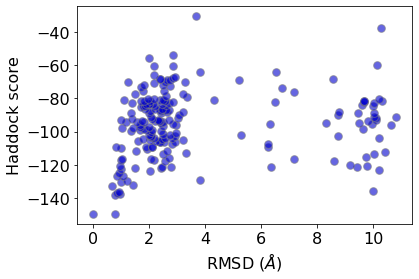

In [6]:
# Plot Haddock score vs. RMSD
plt.scatter(structures['rmsd_all'], 
            structures['haddock-score'], 
            color='mediumblue', 
            alpha=0.6, 
            s=60, 
            edgecolors='grey')

plt.xlabel('RMSD ($\AA$)', fontsize=16)
plt.ylabel('Haddock score', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# save plot
plt.savefig('hs_vs_rmsd_all.png', facecolor='white', dpi=128, bbox_inches="tight")

plt.show()


### Analyze clusters

In [7]:
# list clusters
for index, row in clusters.iterrows():
    print(row['#Cluster'])


file.nam_clust2
file.nam_clust3
file.nam_clust1
file.nam_clust4
file.nam_clust6
file.nam_clust7
file.nam_clust5


In [8]:
# Add a cluster col to structures
structures.insert(0, 'cluster', 0)


In [9]:
# TODO: 
# determine # clusters
# load cluster files, e.g.: file.nam_clust1
# plot HS vs rmsd (cluster colored)

total = 0

for item in clusters['#Cluster']:
    nam_clust = pd.read_csv(f'run1/structures/it1/water/{item}', sep=' ', header=None)
    nam_clust.columns = [item]

    print(len(nam_clust))
    total += len(nam_clust)
    
    clust_num = nam_clust.columns.str.split('file.nam_clust').str[-1].item()

    for pdb in nam_clust[item]:
        row = structures.loc[structures['#struc'] == pdb].index.item()
        structures.at[row, 'cluster'] = clust_num

print(f'total in clusters = {total}')
print(f'all labeled 0 are "other"')


29
12
63
12
5
5
10
total in clusters = 136
all labeled 0 are "other"


/home/chrisb/anaconda3/envs/pilot2/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: `item` has been deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
/home/chrisb/anaconda3/envs/pilot2/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `item` has been deprecated and will be removed in a future version


In [10]:
# check a cluster
structures[structures['cluster'] == 7]


,cluster,#struc,haddock-score,rmsd_all,Einter,Enb,Evdw+0.1Eelec,Evdw,Eelec,Eair,...,Edani,#NOEviol,#Dihedviol,#Jviol,#Saniviol,#veanviol,#Daniviol,bsa,dH,Edesolv
39,7,protein-protein_194w.pdb,-112.227287,10.414,-394.589,-396.091,-78.0444,-42.7059,-353.385,1.50103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.85,-8410.13,1.00551
147,7,protein-protein_177w.pdb,-82.650111,10.040,-218.948,-225.479,-62.3092,-44.1792,-181.300,6.53169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1433.46,-8028.85,-2.86408
154,7,protein-protein_198w.pdb,-81.635470,10.295,-248.797,-284.865,-63.2690,-38.6472,-246.218,36.06810,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1379.34,-8336.76,2.64852
158,7,protein-protein_149w.pdb,-81.352547,9.673,-221.073,-225.446,-54.2452,-35.2229,-190.223,4.37203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1266.50,-8380.74,-8.52225
164,7,protein-protein_148w.pdb,-80.586873,10.196,-190.342,-196.773,-49.3880,-33.0119,-163.761,6.43027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1170.40,-8489.76,-15.46580


In [11]:
# create df of best structures for each cluster

# header
# print('cluster pdb haddock-score')
cols = ['cluster', 'pdb', 'haddock-score']

top_pdb = []

for item in range(0, num_clust+1):
    idx = structures['haddock-score'].loc[structures['cluster'] == item].idxmin()
#     print(structures['cluster'][idx], structures['#struc'][idx], structures['haddock-score'][idx])
    top_pdb.append([structures['cluster'][idx], structures['#struc'][idx], structures['haddock-score'][idx]])

df_top_pdb = pd.DataFrame(top_pdb, columns=cols)

# sort by HS
df_top_pdb.sort_values('haddock-score', inplace=True)

print(df_top_pdb)

# option to save csv
df_top_pdb.to_csv('hs_top_pdb.csv', index=False)


   cluster                       pdb  haddock-score
2        2  protein-protein_188w.pdb    -149.384591
0        0  protein-protein_183w.pdb    -136.303572
3        3  protein-protein_134w.pdb    -135.689930
4        4   protein-protein_50w.pdb    -123.390200
1        1   protein-protein_28w.pdb    -121.514600
6        6  protein-protein_106w.pdb    -120.418400
7        7  protein-protein_194w.pdb    -112.227287
5        5  protein-protein_156w.pdb     -95.858500
